#Imports

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import librosa
import librosa.display
from IPython.display import Audio, display
import warnings
warnings.filterwarnings("ignore")

#Setting up Dataframe

Loading Dataset

In [ ]:
paths = []
labels = []

directory_path = "/content/drive/MyDrive/Dataset/Session 2 Speech Data/TESS Toronto emotional speech set data"
for dirname,_,filenames in os.walk(directory_path):
  for filename in filenames:
    paths.append(os.path.join(dirname,filename))
    label = filename.split('_')[-1]
    label = label.split('.')[0]
    labels.append(label.lower())

There are 2800 data in total

In [ ]:
len(paths)

2800

Creating DataFrame

In [ ]:
data = pd.DataFrame()
data['Speech'] = paths
data['Label'] = labels

Here are the first 5 datas in our DataFrame

In [ ]:
data.head(5)

,Speech,Label
0,/content/drive/MyDrive/Dataset/Session 2 Speec...,disgust
1,/content/drive/MyDrive/Dataset/Session 2 Speec...,disgust
2,/content/drive/MyDrive/Dataset/Session 2 Speec...,disgust
3,/content/drive/MyDrive/Dataset/Session 2 Speec...,disgust
4,/content/drive/MyDrive/Dataset/Session 2 Speec...,disgust


There are exactly 400 datas from each label
*   Disgust = 400
*   Neutral = 400
*   Pleasantly Surprised (ps) = 400
*   Happy = 400
*   Sad = 400
*   Fear = 400
*   Angry = 400









In [ ]:
data['Label'].value_counts()

Label
disgust    400
neutral    400
ps         400
happy      400
sad        400
angry      400
fear       400
Name: count, dtype: int64

In [ ]:
import random

# Select one random sample from each category
disgust_sample = data[data['Label'] == 'disgust'].sample(1)
neutral_sample = data[data['Label'] == 'neutral'].sample(1)
ps_sample = data[data['Label'] == 'ps'].sample(1)
happy_sample = data[data['Label'] == 'happy'].sample(1)
sad_sample = data[data['Label'] == 'sad'].sample(1)
fear_sample = data[data['Label'] == 'fear'].sample(1)
angry_sample = data[data['Label'] == 'angry'].sample(1)

#
samples_to_exclude = pd.concat([disgust_sample, neutral_sample, ps_sample, happy_sample,sad_sample,fear_sample,angry_sample])

# Remove the selected samples from the dataset
data = data.drop(samples_to_exclude.index)

# Print the new dataset size
print(f"New dataset size: {len(data)}")


New dataset size: 2793


In [ ]:
print(len(samples_to_exclude))

7


In [ ]:
data['Label'].value_counts()

Label
disgust    399
neutral    399
ps         399
happy      399
sad        399
angry      399
fear       399
Name: count, dtype: int64

#Exploratory Data Analysis

Text(0.5, 1.0, 'Count of Emotion')

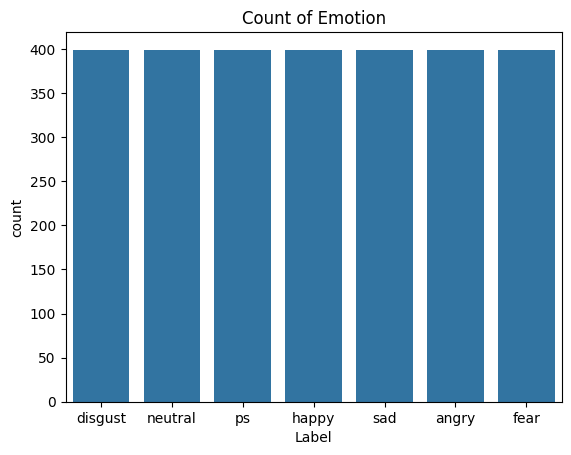

In [ ]:
sns.countplot(data=data,x='Label')
plt.title('Count of Emotion')

Function for Waveform and Spectogram

In [ ]:
def waveplot(data, sample_rate, emotion):
  plt.figure(figsize = (10,4))
  plt.title(emotion,size = 18)
  librosa.display.waveshow(data, sr = sample_rate)
  plt.show()

def spectogram(data,sample_rate,emotion):
  x = librosa.stft(data)
  x_db = librosa.amplitude_to_db(abs(x))
  plt.figure(figsize = (12,4))
  plt.title(emotion,size = 18)
  librosa.display.specshow(x_db,sr=sample_rate,x_axis = "time", y_axis = "hz")
  plt.colorbar()


Audio for Disgust

In [ ]:
path = np.array(data["Speech"][data["Label"]=="disgust"])[0]
Audio(path)

Waveform and Spectogram for disgust

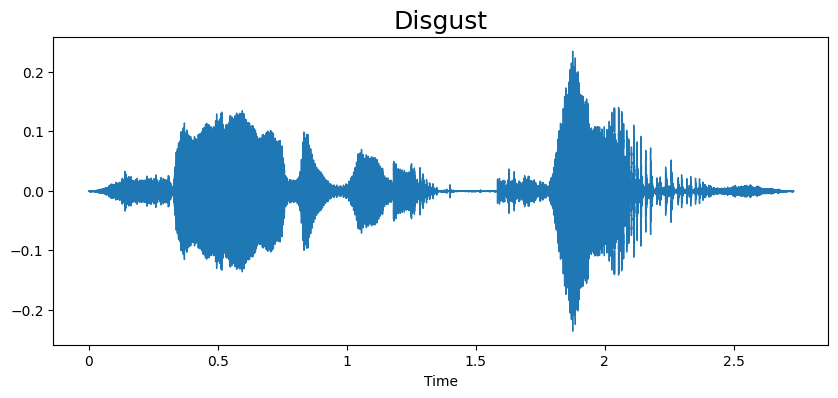

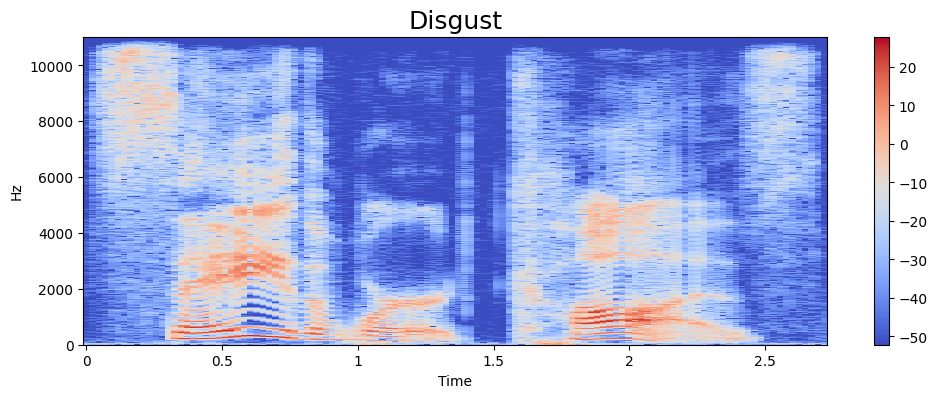

In [ ]:
audio, sample_rate = librosa.load(path)
waveplot(audio,sample_rate,"Disgust")
spectogram(audio,sample_rate,"Disgust")

Audio for Neutral

In [ ]:
path = np.array(data["Speech"][data["Label"]=="neutral"])[0]
Audio(path)

Waveform and Spectogram for Neutral

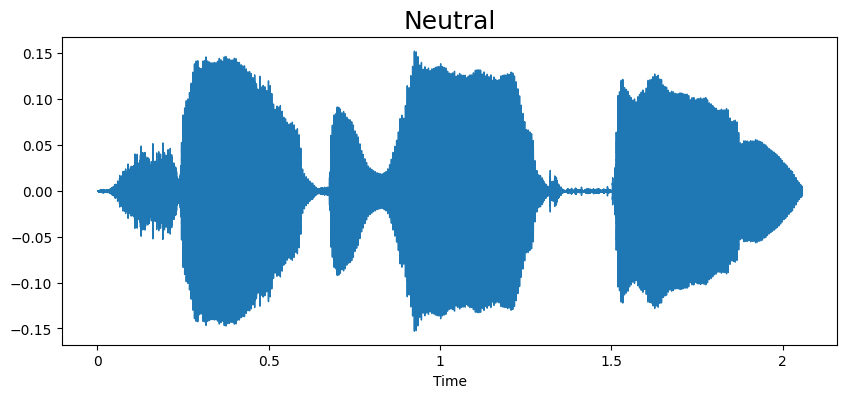

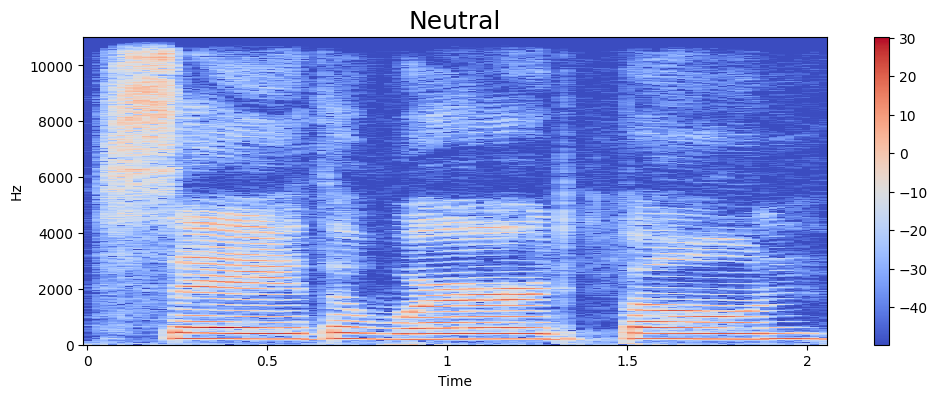

In [ ]:
audio, sample_rate = librosa.load(path)
waveplot(audio,sample_rate,"Neutral")
spectogram(audio,sample_rate,"Neutral")

Audio for Pleasantly Surprised

In [ ]:
path = np.array(data["Speech"][data["Label"]=="ps"])[0]
Audio(path)

Waveform and Spectogram for Pleasantly Surprised

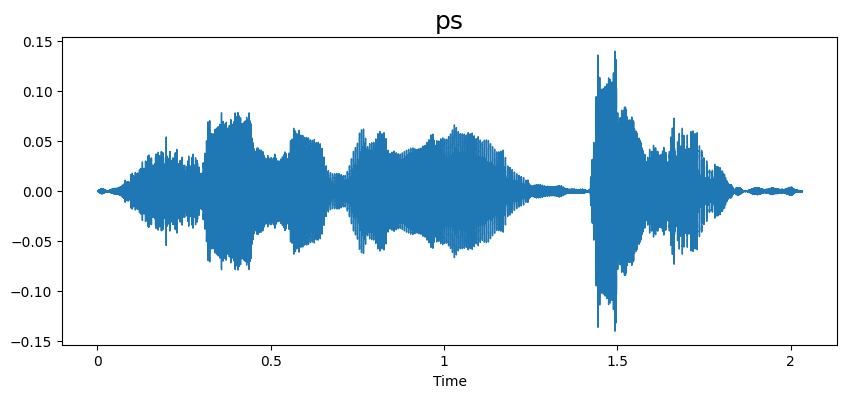

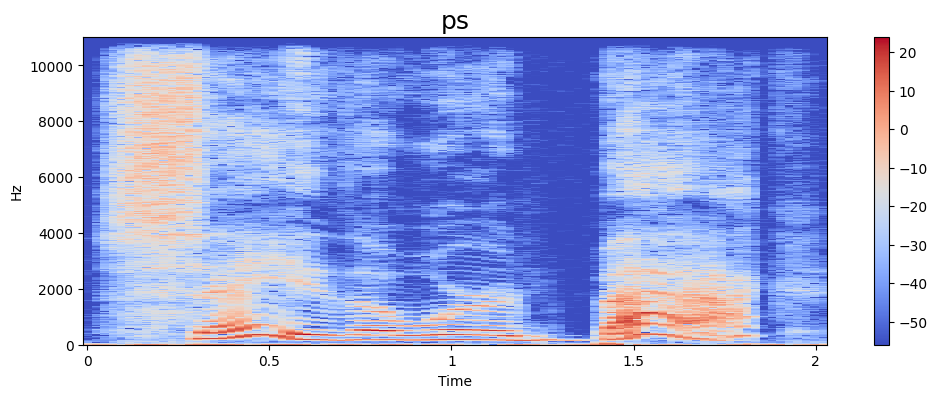

In [ ]:
audio, sample_rate = librosa.load(path)
waveplot(audio,sample_rate,"ps")
spectogram(audio,sample_rate,"ps")

Audio for Happy

In [ ]:
path = np.array(data["Speech"][data["Label"]=="happy"])[0]
Audio(path)

Waveform and Spectogram for Happy

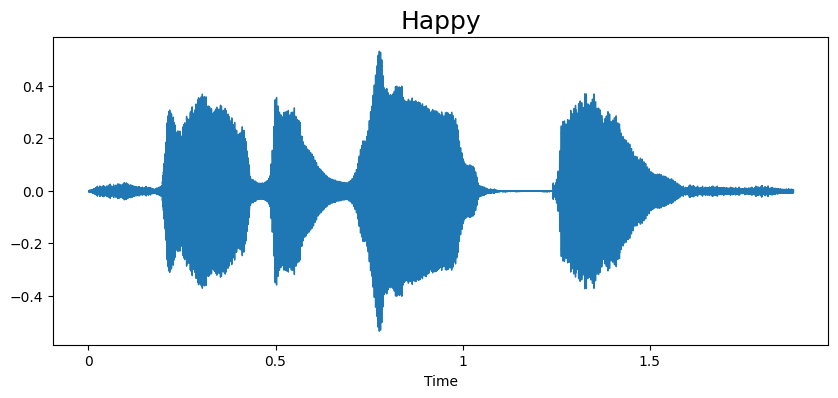

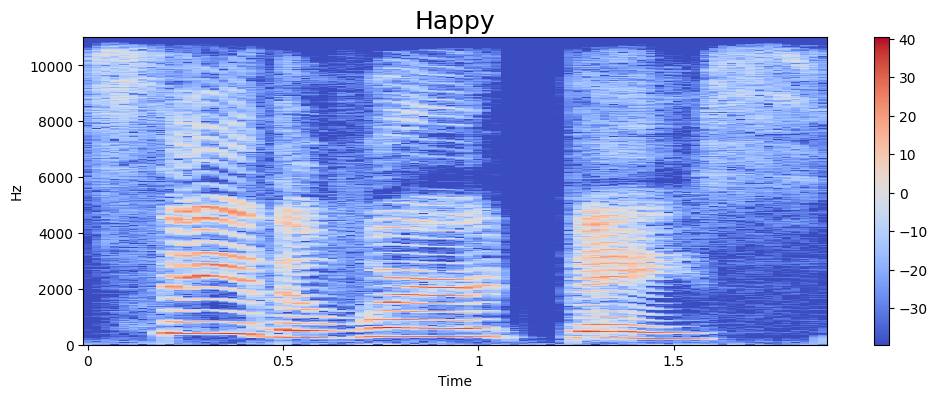

In [ ]:
audio, sample_rate = librosa.load(path)
waveplot(audio,sample_rate,"Happy")
spectogram(audio,sample_rate,"Happy")

Audio for Sad

In [ ]:
path = np.array(data["Speech"][data["Label"]=="sad"])[0]
Audio(path)

Waveform and Spectogram for Sad

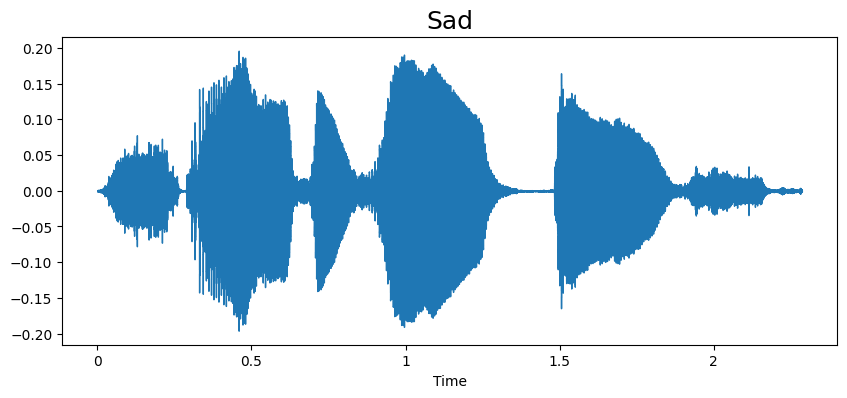

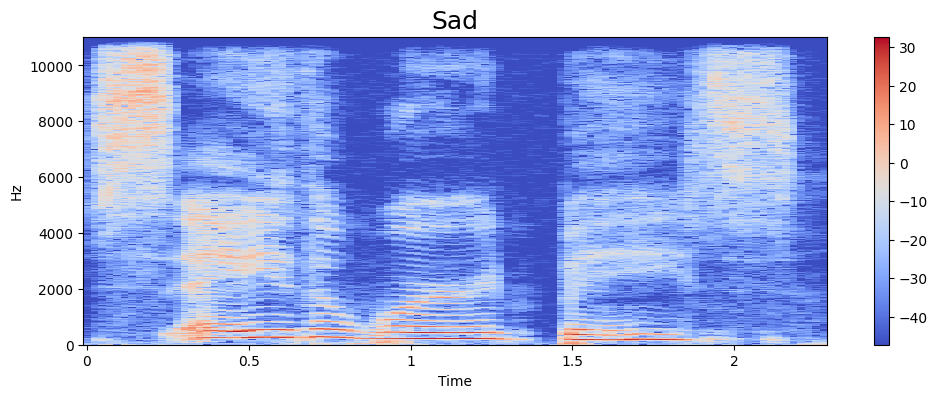

In [ ]:
audio, sample_rate = librosa.load(path)
waveplot(audio,sample_rate,"Sad")
spectogram(audio,sample_rate,"Sad")

Audio for Angry

In [ ]:
path = np.array(data["Speech"][data["Label"]=="angry"])[0]
Audio(path)

Waveform and Spectogram for Angry

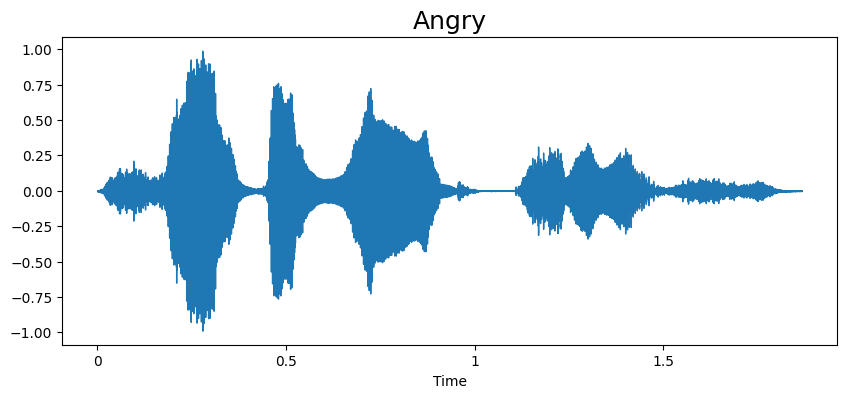

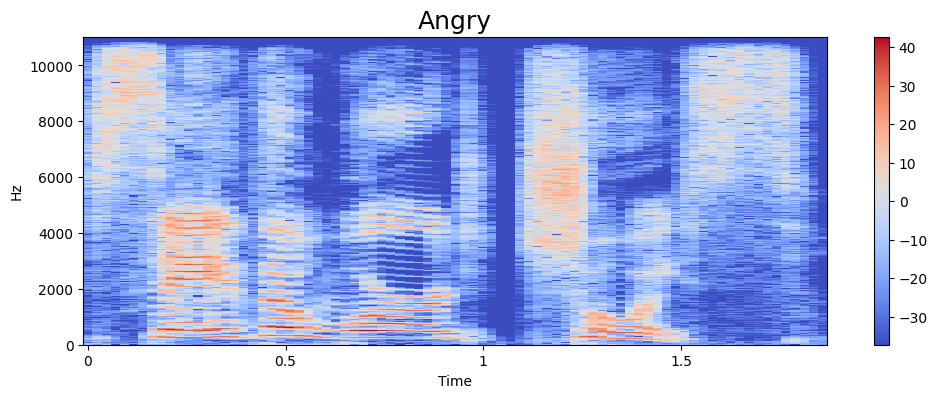

In [ ]:
audio, sample_rate = librosa.load(path)
waveplot(audio,sample_rate,"Angry")
spectogram(audio,sample_rate,"Angry")

Audio for Fear

In [ ]:
path = np.array(data["Speech"][data["Label"]=="fear"])[0]
Audio(path)

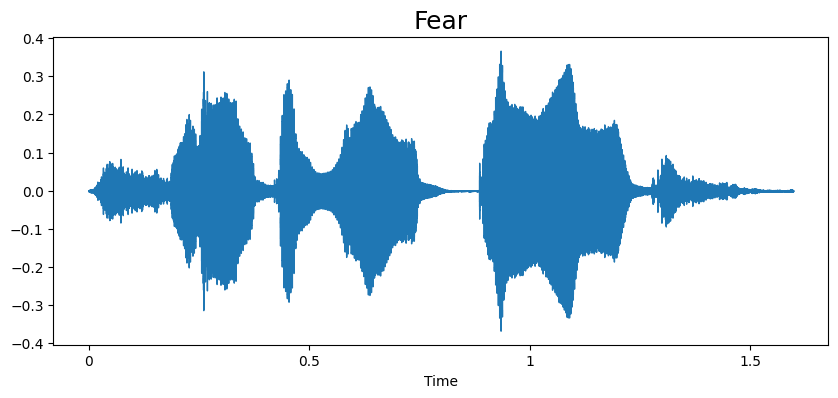

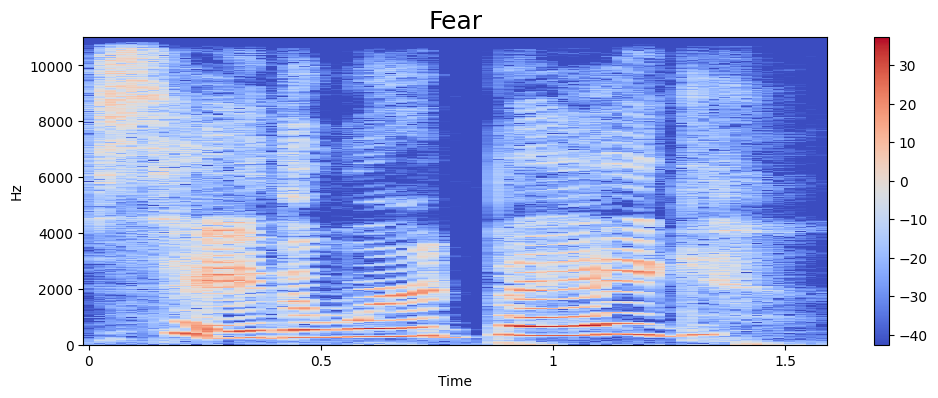

In [ ]:
audio, sample_rate = librosa.load(path)
waveplot(audio,sample_rate,"Fear")
spectogram(audio,sample_rate,"Fear")

#Feature Extraction

In [ ]:
def mfcc(filename):
  waveform, sample_rate = librosa.load(filename,duration = 3)
  return np.mean(librosa.feature.mfcc(y=waveform,sr=sample_rate,n_mfcc = 40).T,axis=0)


In [ ]:
x_mfcc = data['Speech'].apply(lambda x: mfcc(x))

Result of MFCC

In [ ]:
x_mfcc

0       [-404.80234, 57.849667, -4.8916407, 10.686876,...
1       [-369.7238, 72.81947, -14.498348, 9.225916, -1...
2       [-431.587, 48.830227, 13.016538, 21.371422, -2...
3       [-414.98877, 92.06865, -4.287793, 0.47740984, ...
4       [-397.58295, 76.95341, -16.88616, 10.332538, -...
                              ...                        
2795    [-446.92004, 64.326584, 14.922203, -7.3243766,...
2796    [-441.0947, 62.23004, 18.161442, -1.54333, 1.2...
2797    [-471.7944, 68.44926, 20.397062, 2.4458766, 7....
2798    [-426.16226, 84.028496, 16.3562, -5.8467107, 3...
2799    [-434.2355, 78.87959, 9.984385, -7.298446, -1....
Name: Speech, Length: 2793, dtype: object

Convert it into 2d array and convert it into an acceptable value for LSTM

In [ ]:
x = [x for x in x_mfcc]
x = np.array(x)
x = np.expand_dims(x,-1)
x.shape

(2793, 40, 1)

Encode the label

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
y = encoder.fit_transform(data[['Label']])

Convert to array

In [ ]:
y = y.A

Splitting Dataset into training and testing

The ratio is 90% training and 10% testing

The training portion will be further divided into training and validation, hence the final ratio of the dataset will be 80% training 10% validation and 10% testing

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,stratify = y,random_state = 42)

#Building LSTM Model

Import Necessary Library for the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import keras

##Learning Rate = 0.002

In [ ]:
model_lr1= Sequential([
    LSTM(256, return_sequences = False,input_shape = (40,1)),
    Dropout(0.35),
    Dense(128,activation='relu'),
    Dropout(0.35),
    Dense(64,activation='relu'),
    Dropout(0.35),
    Dense(7, activation='softmax')

])

Compile Model

In [ ]:
model_lr1.compile(loss='categorical_crossentropy',
                  optimizer = keras.optimizers.SGD(learning_rate=0.002),
                  metrics=['accuracy'])

As mentioned previously, the training set (90%) is divided into training and validation(1/9 of 90% = 10%), hence 80% training, 10% validation and 10% testing

In [ ]:
history = model_lr1.fit(x_train,y_train,validation_split = 1/9, epochs = 50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 8s 169ms/step - loss: 1.9722 - accuracy: 0.1424 - val_loss: 1.9315 - val_accuracy: 0.1464
Epoch 2/50
35/35 [==============================] - 7s 211ms/step - loss: 1.9441 - accuracy: 0.1639 - val_loss: 1.9127 - val_accuracy: 0.1071
Epoch 3/50
35/35 [==============================] - 5s 149ms/step - loss: 1.9304 - accuracy: 0.1487 - val_loss: 1.8967 - val_accuracy: 0.2000
Epoch 4/50
35/35 [==============================] - 6s 181ms/step - loss: 1.9179 - accuracy: 0.1675 - val_loss: 1.8811 - val_accuracy: 0.2750
Epoch 5/50
35/35 [==============================] - 6s 184ms/step - loss: 1.9000 - accuracy: 0.1957 - val_loss: 1.8648 - val_accuracy: 0.2893
Epoch 6/50
35/35 [==============================] - 5s 149ms/step - loss: 1.8978 - accuracy: 0.1984 - val_loss: 1.8520 - val_accuracy: 0.3000
Epoch 7/50
35/35 [==============================] - 7s 213ms/step - loss: 1.8718 - accuracy: 0.2320 - val_loss: 1.8387 - val_accuracy: 0.3036
Epoch 

In [ ]:
metrics = history.history

In [ ]:
print(metrics)

{'loss': [1.97218918800354, 1.9441306591033936, 1.930431842803955, 1.9179226160049438, 1.90000319480896, 1.8978147506713867, 1.8718398809432983, 1.8654338121414185, 1.8534878492355347, 1.8479652404785156, 1.8313462734222412, 1.825264573097229, 1.8215090036392212, 1.7975434064865112, 1.789047360420227, 1.788468360900879, 1.7677290439605713, 1.7596734762191772, 1.7368241548538208, 1.7370564937591553, 1.7271238565444946, 1.7193771600723267, 1.7057503461837769, 1.69020414352417, 1.673007607460022, 1.6630008220672607, 1.66197669506073, 1.6403945684432983, 1.644121527671814, 1.6198525428771973, 1.6010773181915283, 1.5928032398223877, 1.589906096458435, 1.5783621072769165, 1.5712063312530518, 1.569080114364624, 1.5556873083114624, 1.5452780723571777, 1.5363247394561768, 1.5044046640396118, 1.5024211406707764, 1.5063074827194214, 1.4885716438293457, 1.49314546585083, 1.4783552885055542, 1.471455693244934, 1.470152497291565, 1.4557173252105713, 1.4608275890350342, 1.4535977840423584], 'accuracy

Text(0, 0.5, 'Loss')

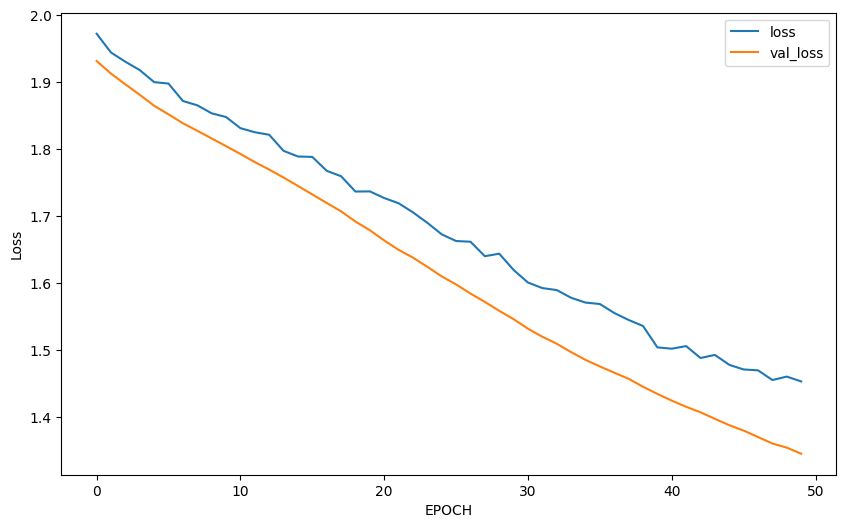

In [ ]:
metrics = history.history
plt.figure(figsize = (10,6))
plt.plot(history.epoch, np.array(metrics['loss']),np.array(metrics['val_loss']))
plt.legend(['loss','val_loss'])
plt.xlabel('EPOCH')
plt.ylabel('Loss')

Predicting using testing data

In [ ]:
y_pred = model_lr1.predict(x_test)

9/9 [==============================] - 1s 34ms/step


###Result

In [ ]:
#Converting it back to categorical data
decoded_pred = encoder.inverse_transform(y_pred)
decoded_label = encoder.inverse_transform(y_test)

#Converting it to 1 - 7 using label encoder
from sklearn.preprocessing import LabelEncoder
Label_Encode = LabelEncoder()

y_pred_result = Label_Encode.fit_transform(decoded_pred)
y_label = Label_Encode.fit_transform(decoded_label)

Creating column filled with labels

In [ ]:
label_column = Label_Encode.inverse_transform(y_label)
labeled_set = set(zip(label_column,y_label))
labeled_set = sorted(labeled_set)
columns = []
for label, num in labeled_set:
  columns.insert(num,label)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_label,y_pred_result,target_names = columns))

              precision    recall  f1-score   support

       angry       0.44      0.78      0.56        40
     disgust       0.56      0.23      0.32        40
        fear       0.84      0.78      0.81        40
       happy       0.00      0.00      0.00        40
     neutral       0.93      1.00      0.96        40
          ps       0.19      0.38      0.26        40
         sad       0.36      0.33      0.34        40

    accuracy                           0.50       280
   macro avg       0.48      0.50      0.46       280
weighted avg       0.48      0.50      0.46       280



## Learning Rate = 0.006

In [ ]:
model_lr2= Sequential([
    LSTM(256, return_sequences = False,input_shape = (40,1)),
    Dropout(0.35),
    Dense(128,activation='relu'),
    Dropout(0.35),
    Dense(64,activation='relu'),
    Dropout(0.35),
    Dense(7, activation='softmax')

])

In [ ]:
model_lr2.compile(loss='categorical_crossentropy',
                  optimizer = keras.optimizers.SGD(learning_rate=0.006),
                  metrics=['accuracy'])

As mentioned previously, the training set (90%) is divided into training and validation(1/9 of 90% = 10%), hence 80% training, 10% validation and 10% testing

In [ ]:
history = model_lr2.fit(x_train,y_train,validation_split = 1/9, epochs = 50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 9s 168ms/step - loss: 1.9521 - accuracy: 0.1854 - val_loss: 1.8798 - val_accuracy: 0.2786
Epoch 2/50
35/35 [==============================] - 7s 188ms/step - loss: 1.8870 - accuracy: 0.2185 - val_loss: 1.8412 - val_accuracy: 0.3000
Epoch 3/50
35/35 [==============================] - 6s 168ms/step - loss: 1.8507 - accuracy: 0.2674 - val_loss: 1.8133 - val_accuracy: 0.3250
Epoch 4/50
35/35 [==============================] - 5s 153ms/step - loss: 1.8217 - accuracy: 0.2817 - val_loss: 1.7783 - val_accuracy: 0.3357
Epoch 5/50
35/35 [==============================] - 7s 212ms/step - loss: 1.7884 - accuracy: 0.3077 - val_loss: 1.7367 - val_accuracy: 0.3607
Epoch 6/50
35/35 [==============================] - 5s 151ms/step - loss: 1.7600 - accuracy: 0.3283 - val_loss: 1.6946 - val_accuracy: 0.3786
Epoch 7/50
35/35 [==============================] - 7s 198ms/step - loss: 1.7232 - accuracy: 0.3520 - val_loss: 1.6505 - val_accuracy: 0.4036
Epoch 

Text(0, 0.5, 'Loss')

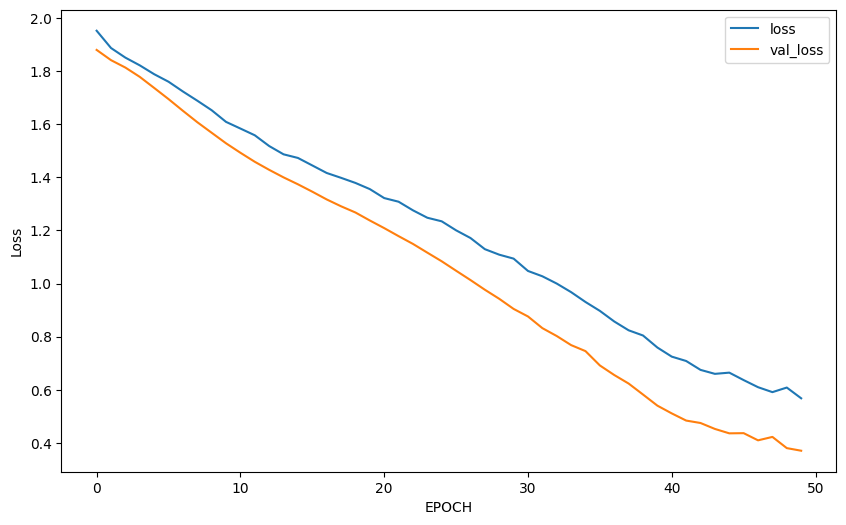

In [ ]:
metrics = history.history
plt.figure(figsize = (10,6))
plt.plot(history.epoch, np.array(metrics['loss']),np.array(metrics['val_loss']))
plt.legend(['loss','val_loss'])
plt.xlabel('EPOCH')
plt.ylabel('Loss')

In [ ]:
y_pred = model_lr2.predict(x_test)

9/9 [==============================] - 1s 38ms/step


In [ ]:
#Converting it back to categorical data
decoded_pred = encoder.inverse_transform(y_pred)
decoded_label = encoder.inverse_transform(y_test)

#Converting it to 1 - 7 using label encoder
from sklearn.preprocessing import LabelEncoder
Label_Encode = LabelEncoder()

y_pred_result = Label_Encode.fit_transform(decoded_pred)
y_label = Label_Encode.fit_transform(decoded_label)

In [ ]:
label_column = Label_Encode.inverse_transform(y_label)
labeled_set = set(zip(label_column,y_label))
labeled_set = sorted(labeled_set)
columns = []
for label, num in labeled_set:
  columns.insert(num,label)

### Result

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_label,y_pred_result,target_names = columns))

              precision    recall  f1-score   support

       angry       0.89      0.80      0.84        40
     disgust       0.96      0.68      0.79        40
        fear       0.89      1.00      0.94        40
       happy       0.76      0.47      0.58        40
     neutral       1.00      1.00      1.00        40
          ps       0.59      0.82      0.69        40
         sad       0.76      0.95      0.84        40

    accuracy                           0.82       280
   macro avg       0.84      0.82      0.81       280
weighted avg       0.84      0.82      0.81       280



##Learning Rate = 0.01

In [ ]:
model_lr3= Sequential([
    LSTM(256, return_sequences = False,input_shape = (40,1)),
    Dropout(0.35),
    Dense(128,activation='relu'),
    Dropout(0.35),
    Dense(64,activation='relu'),
    Dropout(0.35),
    Dense(7, activation='softmax')

])

In [ ]:
model_lr3.compile(loss='categorical_crossentropy',
                  optimizer = keras.optimizers.SGD(learning_rate=0.01),
                  metrics=['accuracy'])

As mentioned previously, the training set (90%) is divided into training and validation(1/9 of 90% = 10%), hence 80% training, 10% validation and 10% testing

In [ ]:
history = model_lr3.fit(x_train,y_train,validation_split = 1/9, epochs = 50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 11s 220ms/step - loss: 1.9347 - accuracy: 0.1635 - val_loss: 1.8681 - val_accuracy: 0.2750
Epoch 2/50
35/35 [==============================] - 6s 165ms/step - loss: 1.8641 - accuracy: 0.2114 - val_loss: 1.8271 - val_accuracy: 0.2893
Epoch 3/50
35/35 [==============================] - 8s 225ms/step - loss: 1.8146 - accuracy: 0.2571 - val_loss: 1.7730 - val_accuracy: 0.4000
Epoch 4/50
35/35 [==============================] - 6s 164ms/step - loss: 1.7708 - accuracy: 0.2938 - val_loss: 1.7115 - val_accuracy: 0.4643
Epoch 5/50
35/35 [==============================] - 8s 224ms/step - loss: 1.7359 - accuracy: 0.3345 - val_loss: 1.6476 - val_accuracy: 0.4714
Epoch 6/50
35/35 [==============================] - 5s 154ms/step - loss: 1.6654 - accuracy: 0.3824 - val_loss: 1.5734 - val_accuracy: 0.5179
Epoch 7/50
35/35 [==============================] - 6s 176ms/step - loss: 1.6033 - accuracy: 0.4057 - val_loss: 1.5112 - val_accuracy: 0.5143
Epoch

Text(0, 0.5, 'Loss')

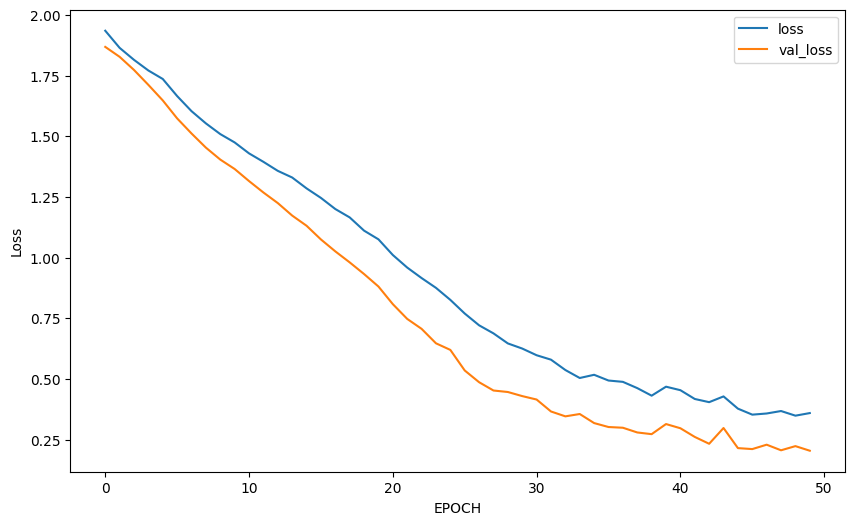

In [ ]:
metrics = history.history
plt.figure(figsize = (10,6))
plt.plot(history.epoch, np.array(metrics['loss']),np.array(metrics['val_loss']))
plt.legend(['loss','val_loss'])
plt.xlabel('EPOCH')
plt.ylabel('Loss')

In [ ]:
y_pred = model_lr3.predict(x_test)

9/9 [==============================] - 0s 36ms/step


In [ ]:
#Converting it back to categorical data
decoded_pred = encoder.inverse_transform(y_pred)
decoded_label = encoder.inverse_transform(y_test)

#Converting it to 1 - 7 using label encoder
from sklearn.preprocessing import LabelEncoder
Label_Encode = LabelEncoder()

y_pred_result = Label_Encode.fit_transform(decoded_pred)
y_label = Label_Encode.fit_transform(decoded_label)

In [ ]:
label_column = Label_Encode.inverse_transform(y_label)
labeled_set = set(zip(label_column,y_label))
labeled_set = sorted(labeled_set)
columns = []
for label, num in labeled_set:
  columns.insert(num,label)

### Result

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_label,y_pred_result,target_names = columns))

              precision    recall  f1-score   support

       angry       0.97      0.85      0.91        40
     disgust       0.95      0.97      0.96        40
        fear       0.97      0.97      0.97        40
       happy       0.82      0.90      0.86        40
     neutral       1.00      1.00      1.00        40
          ps       0.88      0.88      0.88        40
         sad       0.97      0.97      0.97        40

    accuracy                           0.94       280
   macro avg       0.94      0.94      0.94       280
weighted avg       0.94      0.94      0.94       280



#Demo

## Sample Audio

In [ ]:
disgust = np.array(samples_to_exclude["Speech"][samples_to_exclude["Label"]=="disgust"])[0]
display(Audio(disgust))

neutral = np.array(samples_to_exclude["Speech"][samples_to_exclude["Label"]=="neutral"])[0]
display(Audio(neutral))

ps = np.array(samples_to_exclude["Speech"][samples_to_exclude["Label"]=="ps"])[0]
display(Audio(ps))

happy = np.array(samples_to_exclude["Speech"][samples_to_exclude["Label"]=="happy"])[0]
display(Audio(happy))

sad = np.array(samples_to_exclude["Speech"][samples_to_exclude["Label"]=="sad"])[0]
display(Audio(sad))

fear = np.array(samples_to_exclude["Speech"][samples_to_exclude["Label"]=="fear"])[0]
display(Audio(fear))

angry = np.array(samples_to_exclude["Speech"][samples_to_exclude["Label"]=="angry"])[0]
display(Audio(angry))

## Function for Demo

In [ ]:
def array(mfcc):
  x = np.array(mfcc)
  x = np.expand_dims(x,-1)
  return x

In [ ]:
disgust_mfcc = mfcc(disgust)
disgust_arr = array(disgust_mfcc)
disgust_arr_3d = np.expand_dims(disgust_arr, axis=0)

neutral_mfcc = mfcc(neutral)
neutral_arr = array(neutral_mfcc)
neutral_arr_3d = np.expand_dims(neutral_arr, axis=0)

ps_mfcc = mfcc(ps)
ps_arr = array(ps_mfcc)
ps_arr_3d = np.expand_dims(ps_arr, axis=0)

happy_mfcc = mfcc(happy)
happy_arr = array(happy_mfcc)
happy_arr_3d = np.expand_dims(happy_arr, axis=0)

sad_mfcc = mfcc(sad)
sad_arr = array(sad_mfcc)
sad_arr_3d = np.expand_dims(sad_arr, axis=0)

fear_mfcc = mfcc(fear)
fear_arr = array(fear_mfcc)
fear_arr_3d = np.expand_dims(fear_arr, axis=0)

angry_mfcc = mfcc(angry)
angry_arr = array(angry_mfcc)
angry_arr_3d = np.expand_dims(angry_arr, axis=0)

## Model with Learning Rate of 0.002

In [ ]:
first_result = model_lr1.predict(disgust_arr_3d)
first_result = encoder.inverse_transform(first_result)
print(first_result)

second_result = model_lr1.predict(neutral_arr_3d)
second_result = encoder.inverse_transform(second_result)
print(second_result)

Third_result = model_lr1.predict(ps_arr_3d)
Third_result = encoder.inverse_transform(Third_result)
print(Third_result)

Fourth_result = model_lr1.predict(happy_arr_3d)
Fourth_result = encoder.inverse_transform(Fourth_result)
print(Fourth_result)

Fifth_result = model_lr1.predict(sad_arr_3d)
Fifth_result = encoder.inverse_transform(Fifth_result)
print(Fifth_result)

Sixth_result = model_lr1.predict(fear_arr_3d)
Sixth_result = encoder.inverse_transform(Sixth_result)
print(Sixth_result)

Seventh_result = model_lr1.predict(angry_arr_3d)
Seventh_result = encoder.inverse_transform(Seventh_result)
print(Seventh_result)


1/1 [==============================] - 0s 52ms/step
[['sad']]
1/1 [==============================] - 0s 48ms/step
[['neutral']]
1/1 [==============================] - 0s 43ms/step
[['ps']]
1/1 [==============================] - 0s 53ms/step
[['ps']]
1/1 [==============================] - 0s 41ms/step
[['sad']]
1/1 [==============================] - 0s 68ms/step
[['fear']]
1/1 [==============================] - 0s 41ms/step
[['angry']]


## Model with Learning Rate of 0.006

In [ ]:
first_result = model_lr2.predict(disgust_arr_3d)
first_result = encoder.inverse_transform(first_result)
print(first_result)

second_result = model_lr2.predict(neutral_arr_3d)
second_result = encoder.inverse_transform(second_result)
print(second_result)

Third_result = model_lr2.predict(ps_arr_3d)
Third_result = encoder.inverse_transform(Third_result)
print(Third_result)

Fourth_result = model_lr2.predict(happy_arr_3d)
Fourth_result = encoder.inverse_transform(Fourth_result)
print(Fourth_result)

Fifth_result = model_lr2.predict(sad_arr_3d)
Fifth_result = encoder.inverse_transform(Fifth_result)
print(Fifth_result)

Sixth_result = model_lr2.predict(fear_arr_3d)
Sixth_result = encoder.inverse_transform(Sixth_result)
print(Sixth_result)

Seventh_result = model_lr2.predict(angry_arr_3d)
Seventh_result = encoder.inverse_transform(Seventh_result)
print(Seventh_result)



1/1 [==============================] - 0s 60ms/step
[['disgust']]
1/1 [==============================] - 0s 54ms/step
[['neutral']]
1/1 [==============================] - 0s 52ms/step
[['ps']]
1/1 [==============================] - 0s 49ms/step
[['happy']]
1/1 [==============================] - 0s 61ms/step
[['sad']]
1/1 [==============================] - 0s 59ms/step
[['fear']]
1/1 [==============================] - 0s 45ms/step
[['angry']]


## Model with Learning Rate of 0.01

In [ ]:
first_result = model_lr3.predict(disgust_arr_3d)
first_result = encoder.inverse_transform(first_result)
print(first_result)

second_result = model_lr3.predict(neutral_arr_3d)
second_result = encoder.inverse_transform(second_result)
print(second_result)

Third_result = model_lr3.predict(ps_arr_3d)
Third_result = encoder.inverse_transform(Third_result)
print(Third_result)

Fourth_result = model_lr3.predict(happy_arr_3d)
Fourth_result = encoder.inverse_transform(Fourth_result)
print(Fourth_result)

Fifth_result = model_lr3.predict(sad_arr_3d)
Fifth_result = encoder.inverse_transform(Fifth_result)
print(Fifth_result)

Sixth_result = model_lr3.predict(fear_arr_3d)
Sixth_result = encoder.inverse_transform(Sixth_result)
print(Sixth_result)

Seventh_result = model_lr3.predict(angry_arr_3d)
Seventh_result = encoder.inverse_transform(Seventh_result)
print(Seventh_result)


1/1 [==============================] - 0s 32ms/step
[['disgust']]
1/1 [==============================] - 0s 30ms/step
[['neutral']]
1/1 [==============================] - 0s 35ms/step
[['ps']]
1/1 [==============================] - 0s 35ms/step
[['happy']]
1/1 [==============================] - 0s 39ms/step
[['sad']]
1/1 [==============================] - 0s 27ms/step
[['fear']]
1/1 [==============================] - 0s 29ms/step
[['angry']]
